## Capstone Project Final

In [13]:
!pip install bs4
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [5]:
import pandas as pd
import numpy as np

In [14]:
import requests
from bs4 import BeautifulSoup

In [15]:
#Scrape the URL and get the desired data in a clean format
url = "https://commons.wikimedia.org/wiki/Category:Neighborhoods_in_Washington,_D.C."
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
content = soup.find(class_='mw-category')
content_list = content.find_all('a', href=True)

In [18]:
#Extract the names of all neighborhoods and get rid of all the unnecessary data
df_list=[]
for link in content_list:
    href = link['href']
    if 'Category' in href:
        df_list.append(href)
df_draft = pd.DataFrame(df_list,columns=["neighborhood"])
df_draft = df_draft["neighborhood"].replace({'/wiki/Category:':''}, regex=True)
df_draft = pd.DataFrame(df_draft,columns=["neighborhood"])
df_draft = df_draft["neighborhood"].replace({'_':' '}, regex=True)
df_draft = pd.DataFrame(df_draft,columns=["neighborhood"])
df_draft = df_draft["neighborhood"].replace({'Washington, D.C.':''}, regex=True)
df_draft = pd.DataFrame(df_draft,columns=["neighborhood"])
df_draft = df_draft["neighborhood"].replace({'[(),,]':''}, regex=True)
df = pd.DataFrame(df_draft,columns=["neighborhood"])
df = df.drop(index=0,axis=0)
df.head(10)

,neighborhood
1,Neighborhoods in Northeast
2,Adams Morgan
3,Anacostia
4,Barney Circle
5,Barry Farm
6,Benning Ridge
7,Berkley
8,Blagden Alley-Naylor Court Historic District
9,Bloomingdale
10,Brightwood Park


In [19]:
#Get coordinate values of all neighborhoods
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
geolocator = Nominatim(user_agent="Washington DC")

df['search']= (df['neighborhood']+", Washington, D.C.").apply(geolocator.geocode)

#Dropping all neighborhoods that did not return coordinates
nan_value = float("NaN")
df.replace("None", nan_value, inplace=True)
df.dropna(subset = ["search"], inplace=True)

df['search'].apply(lambda x: (x.latitude, x.longitude))
df[['point', 'coords']] = df['search'].apply(pd.Series)
df.drop(['search'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,neighborhood,point,coords
0,Adams Morgan,"Adams Morgan, Washington, District of Columbia...","(38.9215002, -77.0421992)"
1,Anacostia,"Anacostia, Washington, District of Columbia, U...","(38.8625806, -76.98444095341674)"
2,Barney Circle,"Barney Circle Southeast, Hill East, Washington...","(38.8801211, -76.9851143)"
3,Barry Farm,"Barry Farm, Washington, District of Columbia, ...","(38.8598039, -76.9969706)"
4,Benning Ridge,"Benning Ridge, Washington, District of Columbi...","(38.88135145, -76.93863030975535)"


In [60]:
#split the coordinates into their perspective lat and long columns and add to the main DataFrame
df_coords = pd.DataFrame(df['coords'].tolist(), index=df.index, columns=['Latitude','Longitude'])
df_DC = pd.concat([df, df_coords], axis=1)
df_DC.drop('coords', axis=1, inplace=True)
df_DC.drop('point', axis=1, inplace=True)
df_DC.rename(columns = {'neighborhood':'Neighborhood'}, inplace = True)
df_DC

,Neighborhood,Latitude,Longitude
0,Adams Morgan,38.921500,-77.042199
1,Anacostia,38.862581,-76.984441
2,Barney Circle,38.880121,-76.985114
3,Barry Farm,38.859804,-76.996971
4,Benning Ridge,38.881351,-76.938630
5,Berkley,38.952072,-77.098358
6,Blagden Alley-Naylor Court Historic District,38.907115,-77.024980
7,Bloomingdale,38.916778,-77.011365
8,Brightwood Park,38.956734,-77.027992
9,Brightwood,38.965633,-77.027115


### Explore DC neighborhoods

In [21]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [22]:
# Get geographical coordinates of DC
address = 'Washington D.C.'

geolocator = Nominatim(user_agent="Washington DC")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Washington DC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Washington DC are 38.8949924, -77.0365581.


In [23]:
map_DC = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_DC['Latitude'], df_DC['Longitude'], df_DC['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DC)  
    
map_DC

In [24]:
CLIENT_ID = 'FMQI43DFPBUWIU1JMBM4233K4XVINND3ZLGFK3SKIAA3GV1A' # your Foursquare ID
CLIENT_SECRET = 'TW1BGWEQ3BYDC1QR2B3ZSFYSVYY4QFZ1A05WNRDKHTZJIYZQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FMQI43DFPBUWIU1JMBM4233K4XVINND3ZLGFK3SKIAA3GV1A
CLIENT_SECRET:TW1BGWEQ3BYDC1QR2B3ZSFYSVYY4QFZ1A05WNRDKHTZJIYZQ


In [25]:
df_DC.loc[0, 'Neighborhood']

'Adams Morgan'

In [26]:
# Function to get all the nearby venues pertaining to each neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
DC_venues = getNearbyVenues(names=df_DC['Neighborhood'],
                                   latitudes=df_DC['Latitude'],
                                   longitudes=df_DC['Longitude']
                                  )

Adams Morgan
Anacostia
Barney Circle
Barry Farm 
Benning Ridge
Berkley 
Blagden Alley-Naylor Court Historic District
Bloomingdale 
Brightwood Park
Brightwood 
Brookland 
Burrville 
Buzzard Point
Capitol Hill 
Cathedral Heights 
Chevy Chase 
Chinatown 
Cleveland Park 
Columbia Heights 
Congress Heights
Crestwood 
Deanwood 
Downtown 
Dupont Circle
Eckington 
Edgewood 
Embassy Row 
Federal Triangle
Foggy Bottom
Forest Hills 
Fort Dupont 
Fort Totten 
Foxhall 
Friendship Heights 
Gateway 
Georgetown 
Glover Park 
Golden Triangle 
Greenway 
Ivy City 
Judiciary Square
Kalorama Triangle 
Kingman Park 
LeDroit Park
Logan Circle
Manor Park 
Marshall Heights 
Massachusetts Heights 
Michigan Park 
Mount Pleasant 
Mount Vernon Square
Mount Vernon Triangle
Navy Yard 
Near Northeast 
NoMa 
North Cleveland Park 
North Michigan Park
The Palisades 
Park View 
Penn Quarter 
Petworth 
Pleasant Hill 
Randle Highlands
Reno 
Riggs Park
Shaw 
Shepherd Park 
Sheridan-Kalorama
Southwest Federal Center 
Southwe

In [28]:
print(DC_venues.shape)
DC_venues.head()

(2548, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams Morgan,38.9215,-77.042199,Lapis,38.921302,-77.043890,Afghan Restaurant
1,Adams Morgan,38.9215,-77.042199,The LINE Hotel,38.922815,-77.041688,Hotel
2,Adams Morgan,38.9215,-77.042199,Donburi,38.921673,-77.042385,Japanese Restaurant
3,Adams Morgan,38.9215,-77.042199,The Green Zone,38.919483,-77.041845,Cocktail Bar
4,Adams Morgan,38.9215,-77.042199,Tryst,38.921947,-77.042168,Coffee Shop


In [29]:
DC_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adams Morgan,55,55,55,55,55,55
Anacostia,6,6,6,6,6,6
Barney Circle,36,36,36,36,36,36
Barry Farm,7,7,7,7,7,7
Benning Ridge,4,4,4,4,4,4
Berkley,3,3,3,3,3,3
Blagden Alley-Naylor Court Historic District,57,57,57,57,57,57
Bloomingdale,32,32,32,32,32,32
Brightwood,21,21,21,21,21,21


#### Analyze each neighborhood

In [30]:
# one hot encoding
DC_onehot = pd.get_dummies(DC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
DC_onehot['Neighborhood'] = DC_venues['Neighborhood'] 

# move neighborhood column to the first column
first_column=DC_onehot.pop('Neighborhood')
DC_onehot.insert(0, 'Neighborhood', first_column)

DC_onehot.head()

,Neighborhood,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Rec Center,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Heliport,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Nightlife Spot,Office,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Puerto Rican Restaurant,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Synagogue,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Te

In [31]:
# Group rows by neighborhood and calculate mean of frequency of occurence of each category

DC_grouped = DC_onehot.groupby('Neighborhood').mean().reset_index()
DC_grouped

,Neighborhood,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Rec Center,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Heliport,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Nightlife Spot,Office,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Puerto Rican Restaurant,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Synagogue,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Te

In [32]:
DC_grouped.shape

(78, 298)

In [33]:
#Print top 5 venues of each neighborhood

num_top_venues = 5

for hood in DC_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = DC_grouped[DC_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams Morgan----
                      venue  freq
0                       Bar  0.07
1            Ice Cream Shop  0.05
2               Coffee Shop  0.05
3  Mediterranean Restaurant  0.04
4              Cocktail Bar  0.04


----Anacostia----
                 venue  freq
0  American Restaurant  0.17
1    Convenience Store  0.17
2       Sandwich Place  0.17
3       History Museum  0.17
4        Grocery Store  0.17


----Barney Circle----
                  venue  freq
0        Sandwich Place  0.08
1           Coffee Shop  0.06
2          Liquor Store  0.06
3  Gym / Fitness Center  0.06
4          Intersection  0.06


----Barry Farm ----
                 venue  freq
0             Bus Stop  0.29
1     Basketball Court  0.14
2  Rental Car Location  0.14
3    Convenience Store  0.14
4        Metro Station  0.14


----Benning Ridge----
               venue  freq
0               Park  0.25
1  Convenience Store  0.25
2   Insurance Office  0.25
3       Burger Joint  0.25
4     Nightlife Spot  

In [34]:
# Function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = DC_grouped['Neighborhood']

for ind in np.arange(DC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams Morgan,Bar,Coffee Shop,Ice Cream Shop,Mediterranean Restaurant,BBQ Joint,Asian Restaurant,Cocktail Bar,Diner,Burger Joint,Japanese Restaurant
1,Anacostia,Convenience Store,American Restaurant,Grocery Store,Gym,Sandwich Place,History Museum,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
2,Barney Circle,Sandwich Place,Liquor Store,Gym / Fitness Center,Intersection,Coffee Shop,Harbor / Marina,Mobile Phone Shop,Food Court,Fast Food Restaurant,Snack Place
3,Barry Farm,Bus Stop,Convenience Store,Rental Car Location,Metro Station,Intersection,Basketball Court,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Benning Ridge,Convenience Store,Burger Joint,Park,Insurance Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fish & Chips Shop,Exhibit
5,Berkley,Yoga Studio,Park,Business Service,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Event Space
6,Blagden Alley-Naylor Court Historic District,Grocery Store,Hotel,Coffee Shop,Bar,Gym / Fitness Center,American Restaurant,Cocktail Bar,Dive Bar,Mexican Restaurant,Pizza Place
7,Bloomingdale,Bus Stop,Food & Drink Shop,Grocery Store,BBQ Joint,Bus Station,Café,Park,Pool,Dog Run,Chinese Restaurant
8,Brightwood,Pizza Place,Chinese Restaurant,Historic Site,Sandwich Place,Fast Food Restaurant,Bus Stop,Gas Station,Discount Store,Café,Coffee Shop
9,Brightwood Park,Cosmetics Shop,Café,Pizza Place,Chinese Restaurant,ATM,Bus Station,Fried Chicken Joint,Latin American Restaurant,Spa,Liquor Store


#### Cluster Neighborhoods

#### For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used. First, let's find out the optimal number of clusters. For that, we will create a graph of the silhouette scores.

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [43]:
max_range = 10

DC_grouped_clustering = DC_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = DC_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

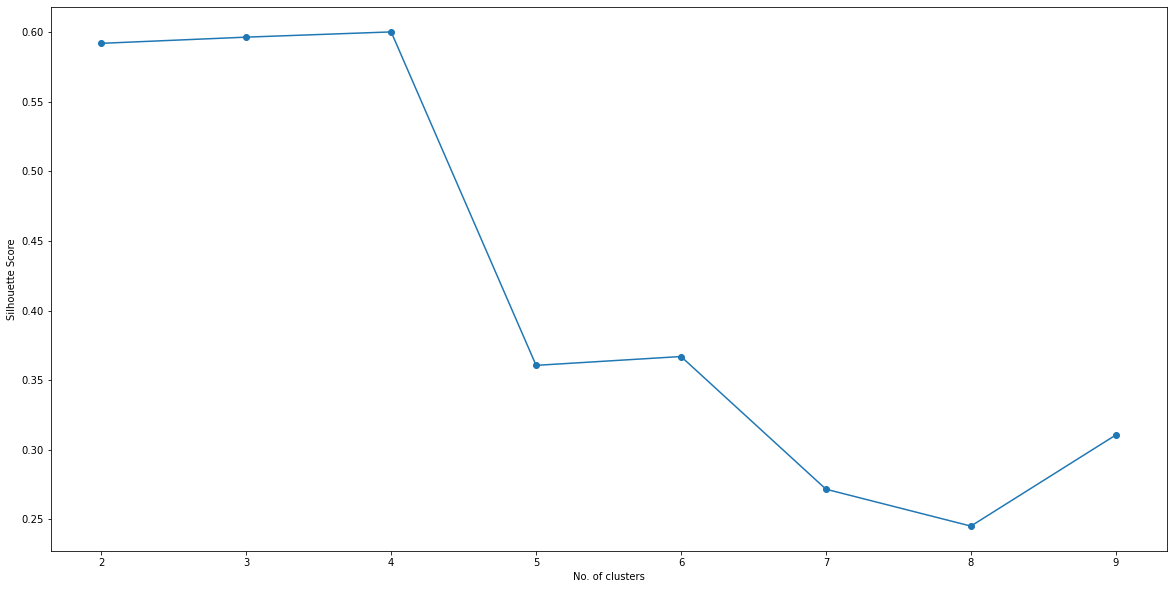

In [44]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

#### As we can see, the score is highest for k=4. Now let's run the K-means clustering with the optimal number of clusters, which is 4.

In [80]:
# Use K Means to cluster neighborhood into 4 clusters

kclusters = 4

DC_grouped_clustering = DC_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [89]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

DC_merged = df_DC

# merge DC_grouped with df_DC to add latitude/longitude for each neighborhood
DC_merged = DC_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


#### We would not want to explore neighborhoods that already have frequently occuring Indian restaurants in order to avoid market competition. Let's first start by filtering out the neighborhoods that have Indian restaurants in the top 10 most freqently occuring venues and then remove them from the dataframe.

In [92]:
DC_merged_indian=DC_merged[DC_merged.eq("Indian Restaurant").any(1)]
DC_merged_indian

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Dupont Circle,38.912423,-77.041251,0.0,Pizza Place,Italian Restaurant,Spa,Steakhouse,Thai Restaurant,Cocktail Bar,Cosmetics Shop,Bistro,Park,Indian Restaurant
40,Judiciary Square,38.896086,-77.016681,0.0,Theater,Bar,Ramen Restaurant,American Restaurant,Indian Restaurant,Cocktail Bar,Italian Restaurant,Japanese Restaurant,Food Truck,Dive Bar
50,Mount Vernon Square,38.902531,-77.022948,0.0,Hotel,American Restaurant,Italian Restaurant,Bar,Coffee Shop,Cocktail Bar,New American Restaurant,Mediterranean Restaurant,Indian Restaurant,Gym / Fitness Center
59,Penn Quarter,38.895896,-77.022268,0.0,American Restaurant,Theater,Indian Restaurant,Monument / Landmark,Pizza Place,Cocktail Bar,Salad Place,Plaza,Italian Restaurant,Basketball Stadium
67,Sheridan-Kalorama,38.912155,-77.050659,0.0,Spa,Park,History Museum,Coffee Shop,Salon / Barbershop,Bagel Shop,Nail Salon,Ice Cream Shop,Tea Room,Indian Restaurant
71,Swampoodle,38.903528,-77.002316,0.0,Coffee Shop,Sandwich Place,Gym / Fitness Center,Indian Restaurant,Pharmacy,Liquor Store,Food Truck,Grocery Store,Hotel,Yoga Studio
76,West End,38.907056,-77.049699,0.0,Hotel,Gym,Indian Restaurant,Coffee Shop,Café,Turkish Restaurant,Hotel Bar,Bar,New American Restaurant,Pizza Place


In [93]:
DC_merged_final= pd.merge(DC_merged,DC_merged_indian, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [94]:
DC_merged_final[DC_merged_final.eq("Indian Restaurant").any(1)]

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [95]:
DC_merged_final=DC_merged_final.dropna() # One of the neighborhoods returned NaN values while looking for venues in it. Need to drop it in order to create the cluster map.
DC_merged_final.shape

(71, 14)

In [98]:
DC_merged_final = DC_merged_final.astype({"Cluster Labels": int})
DC_merged_final

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams Morgan,38.921500,-77.042199,0,Bar,Coffee Shop,Ice Cream Shop,Mediterranean Restaurant,BBQ Joint,Asian Restaurant,Cocktail Bar,Diner,Burger Joint,Japanese Restaurant
1,Anacostia,38.862581,-76.984441,0,Convenience Store,American Restaurant,Grocery Store,Gym,Sandwich Place,History Museum,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
2,Barney Circle,38.880121,-76.985114,0,Sandwich Place,Liquor Store,Gym / Fitness Center,Intersection,Coffee Shop,Harbor / Marina,Mobile Phone Shop,Food Court,Fast Food Restaurant,Snack Place
3,Barry Farm,38.859804,-76.996971,0,Bus Stop,Convenience Store,Rental Car Location,Metro Station,Intersection,Basketball Court,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Benning Ridge,38.881351,-76.938630,0,Convenience Store,Burger Joint,Park,Insurance Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fish & Chips Shop,Exhibit
5,Berkley,38.952072,-77.098358,0,Yoga Studio,Park,Business Service,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Event Space
6,Blagden Alley-Naylor Court Historic District,38.907115,-77.024980,0,Grocery Store,Hotel,Coffee Shop,Bar,Gym / Fitness Center,American Restaurant,Cocktail Bar,Dive Bar,Mexican Restaurant,Pizza Place
7,Bloomingdale,38.916778,-77.011365,0,Bus Stop,Food & Drink Shop,Grocery Store,BBQ Joint,Bus Station,Café,Park,Pool,Dog Run,Chinese Restaurant
8,Brightwood Park,38.956734,-77.027992,0,Cosmetics Shop,Café,Pizza Place,Chinese Restaurant,ATM,Bus Station,Fried Chicken Joint,Latin American Restaurant,Spa,Liquor Store
9,Brightwood,38.965633,-77.027115,0,Pizza Place,Chinese Restaurant,Historic Site,Sandwich Place,Fast Food Restaurant,Bus Stop,Gas Station,Discount Store,Café,Coffee Shop


In [99]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(DC_merged_final['Latitude'], DC_merged_final['Longitude'], DC_merged_final['Neighborhood'], DC_merged_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [104]:
DC_merged_final.loc[DC_merged_final['Cluster Labels'] == 0,DC_merged_final.columns[[0] + list(range(4, DC_merged_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams Morgan,Bar,Coffee Shop,Ice Cream Shop,Mediterranean Restaurant,BBQ Joint,Asian Restaurant,Cocktail Bar,Diner,Burger Joint,Japanese Restaurant
1,Anacostia,Convenience Store,American Restaurant,Grocery Store,Gym,Sandwich Place,History Museum,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
2,Barney Circle,Sandwich Place,Liquor Store,Gym / Fitness Center,Intersection,Coffee Shop,Harbor / Marina,Mobile Phone Shop,Food Court,Fast Food Restaurant,Snack Place
3,Barry Farm,Bus Stop,Convenience Store,Rental Car Location,Metro Station,Intersection,Basketball Court,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Benning Ridge,Convenience Store,Burger Joint,Park,Insurance Office,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fish & Chips Shop,Exhibit
5,Berkley,Yoga Studio,Park,Business Service,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Event Space
6,Blagden Alley-Naylor Court Historic District,Grocery Store,Hotel,Coffee Shop,Bar,Gym / Fitness Center,American Restaurant,Cocktail Bar,Dive Bar,Mexican Restaurant,Pizza Place
7,Bloomingdale,Bus Stop,Food & Drink Shop,Grocery Store,BBQ Joint,Bus Station,Café,Park,Pool,Dog Run,Chinese Restaurant
8,Brightwood Park,Cosmetics Shop,Café,Pizza Place,Chinese Restaurant,ATM,Bus Station,Fried Chicken Joint,Latin American Restaurant,Spa,Liquor Store
9,Brightwood,Pizza Place,Chinese Restaurant,Historic Site,Sandwich Place,Fast Food Restaurant,Bus Stop,Gas Station,Discount Store,Café,Coffee Shop


In [105]:
DC_merged_final.loc[DC_merged_final['Cluster Labels'] == 1,DC_merged_final.columns[[0] + list(range(4, DC_merged_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Foxhall,Museum,Zoo Exhibit,Exhibit,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [106]:
DC_merged_final.loc[DC_merged_final['Cluster Labels'] == 2,DC_merged_final.columns[[0] + list(range(4, DC_merged_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Brookland,Boarding House,Zoo Exhibit,Exhibit,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [107]:
DC_merged_final.loc[DC_merged_final['Cluster Labels'] == 3,DC_merged_final.columns[[0] + list(range(4, DC_merged_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Forest Hills,Public Art,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Zoo Exhibit
